In [33]:
import sys
from qutip_simulation_functions import *
import numpy as np
import qutip as qt
import scipy.signal as sp

%matplotlib inline

In [34]:
nq = 10
g = qt.basis(nq,0)
e = qt.basis(nq,1)
f = qt.basis(nq, 2)
h = qt.basis(nq, 3)

psi0 = g

b = qt.destroy(nq)

qubit_x = b + b.dag()
qubit_y = -1j * (b - b.dag())
qubit_z = 2 * b.dag() * b - qt.qeye(nq)

e_ops = [qubit_x, qubit_y, qubit_z]
c_ops = []

In [44]:
h_bar = 1
qubit_frequency_ghz = 2 * np.pi * 5
alpha_ghz = 2 * np.pi * 0.2

transmon_hamiltonian = - h_bar * alpha_ghz / 2 * b.dag() * b.dag() * b * b

In [45]:
transmon_hamiltonian.eigenenergies()/(2*np.pi)

array([-7.2, -5.6, -4.2, -3. , -2. , -1.2, -0.6, -0.2,  0. ,  0. ])

In [66]:
pulse_length_ns = 200
pulse_sigma_ns = 10
omega = 0.05 * sp.gaussian(pulse_length_ns, pulse_sigma_ns)

In [67]:
omega

array([1.58799921e-23, 4.27367822e-23, 1.13870286e-22, 3.00383490e-22,
       7.84510501e-22, 2.02851638e-21, 5.19296424e-21, 1.31616155e-20,
       3.30263154e-20, 8.20480195e-20, 2.01805564e-19, 4.91422713e-19,
       1.18477087e-18, 2.82794246e-18, 6.68288246e-18, 1.56355849e-17,
       3.62177525e-17, 8.30588506e-17, 1.88585107e-16, 4.23921968e-16,
       9.43455690e-16, 2.07880690e-15, 4.53485959e-15, 9.79423671e-15,
       2.09427834e-14, 4.43358729e-14, 9.29251306e-14, 1.92827136e-13,
       3.96150473e-13, 8.05766599e-13, 1.62261467e-12, 3.23503207e-12,
       6.38555777e-12, 1.24788953e-11, 2.41440710e-11, 4.62489538e-11,
       8.77102565e-11, 1.64685706e-10, 3.06138876e-10, 5.63427600e-10,
       1.02663202e-09, 1.85203228e-09, 3.30780082e-09, 5.84907520e-09,
       1.02398151e-08, 1.77481904e-08, 3.04560166e-08, 5.17427106e-08,
       8.70326698e-08, 1.44934739e-07, 2.38956987e-07, 3.90053365e-07,
       6.30355259e-07, 1.00856475e-06, 1.59764119e-06, 2.50560014e-06,
      

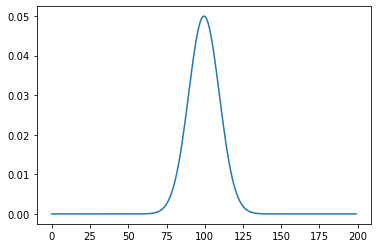

In [68]:
fig,ax = plt.subplots()
ax.plot(omega)

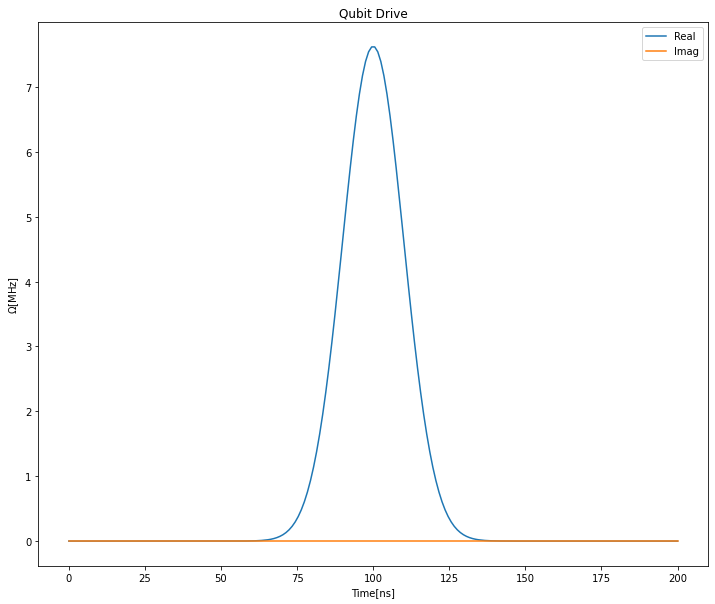

In [69]:
H_tot = driven_hamiltonian(omega=omega, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)

In [70]:
tlist = np.linspace(0, pulse_length_ns, 1000)

In [71]:
res = qt.mesolve(H_tot,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))

In [72]:
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]

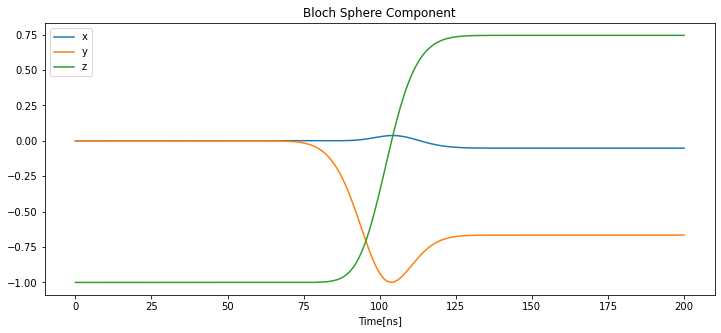

In [73]:
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)

In [74]:
omega

array([1.58799921e-23, 4.27367822e-23, 1.13870286e-22, 3.00383490e-22,
       7.84510501e-22, 2.02851638e-21, 5.19296424e-21, 1.31616155e-20,
       3.30263154e-20, 8.20480195e-20, 2.01805564e-19, 4.91422713e-19,
       1.18477087e-18, 2.82794246e-18, 6.68288246e-18, 1.56355849e-17,
       3.62177525e-17, 8.30588506e-17, 1.88585107e-16, 4.23921968e-16,
       9.43455690e-16, 2.07880690e-15, 4.53485959e-15, 9.79423671e-15,
       2.09427834e-14, 4.43358729e-14, 9.29251306e-14, 1.92827136e-13,
       3.96150473e-13, 8.05766599e-13, 1.62261467e-12, 3.23503207e-12,
       6.38555777e-12, 1.24788953e-11, 2.41440710e-11, 4.62489538e-11,
       8.77102565e-11, 1.64685706e-10, 3.06138876e-10, 5.63427600e-10,
       1.02663202e-09, 1.85203228e-09, 3.30780082e-09, 5.84907520e-09,
       1.02398151e-08, 1.77481904e-08, 3.04560166e-08, 5.17427106e-08,
       8.70326698e-08, 1.44934739e-07, 2.38956987e-07, 3.90053365e-07,
       6.30355259e-07, 1.00856475e-06, 1.59764119e-06, 2.50560014e-06,
      

In [75]:
np.trapz(omega)

1.2533141373155003

In [84]:
def pi_pulse_generator(sigma, length):
    gauss_waveform = sp.gaussian(length, sigma)
    area = np.trapz(gauss_waveform)
    pi_pulse = np.pi * gauss_waveform / (2 * area)
    return pi_pulse

In [85]:
np.trapz(pi_pulse_generator(pulse_sigma_ns, pulse_length_ns))

1.5707963267948963

In [86]:
omega2 = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)

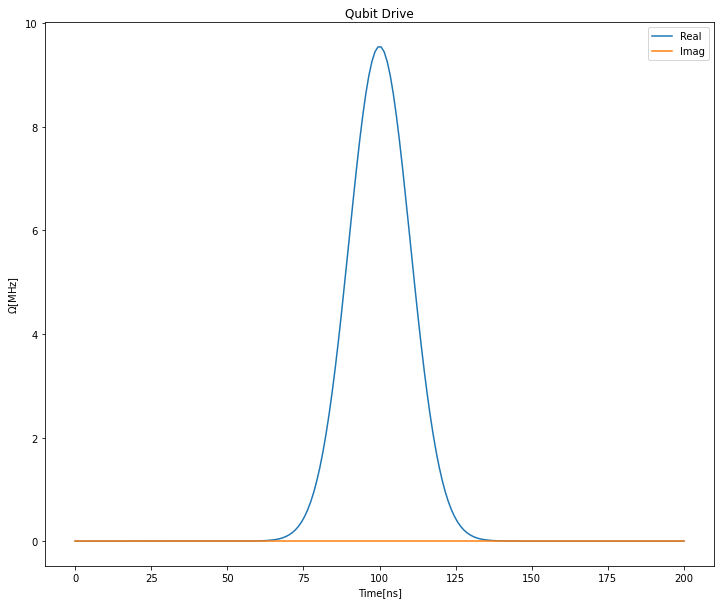

In [87]:
H_tot2 = driven_hamiltonian(omega=omega2, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)

In [88]:
res = qt.mesolve(H_tot2,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))

In [89]:
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]

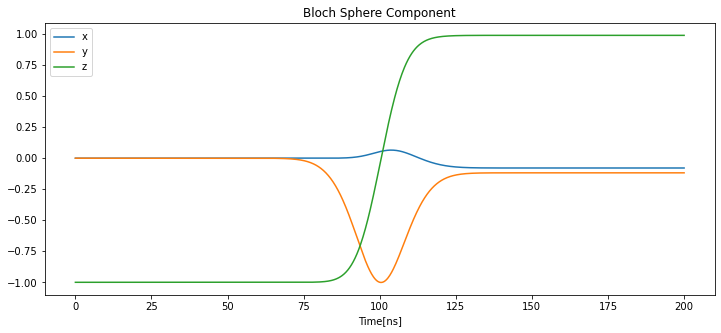

In [90]:
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)

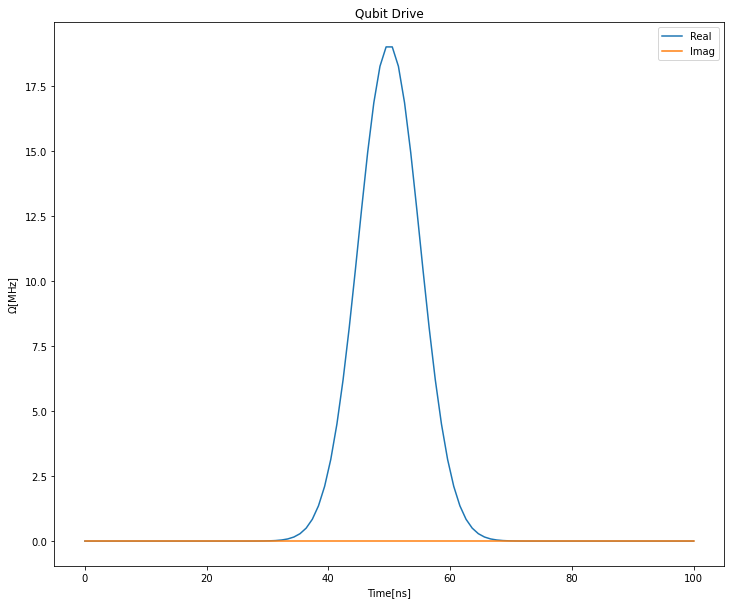

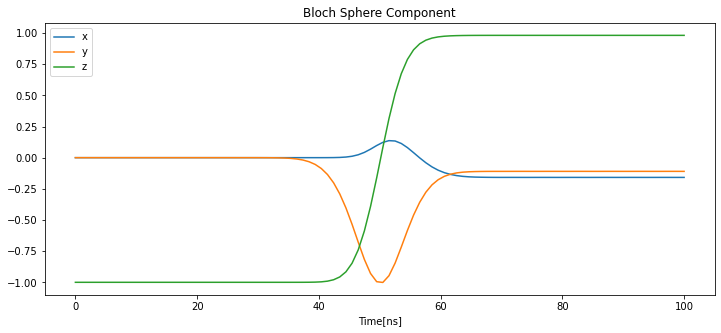

In [91]:
pulse_sigma_ns = 5
pulse_length_ns = 20 * pulse_sigma_ns

tlist = np.linspace(0, pulse_length_ns, pulse_length_ns)
omega_100_ns = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
H_100_ns = driven_hamiltonian(omega=omega_100_ns, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(H_100_ns,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)

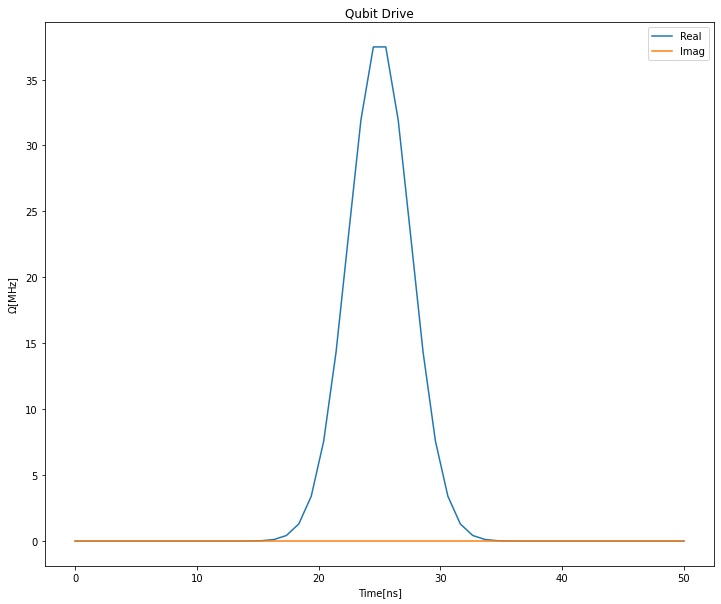

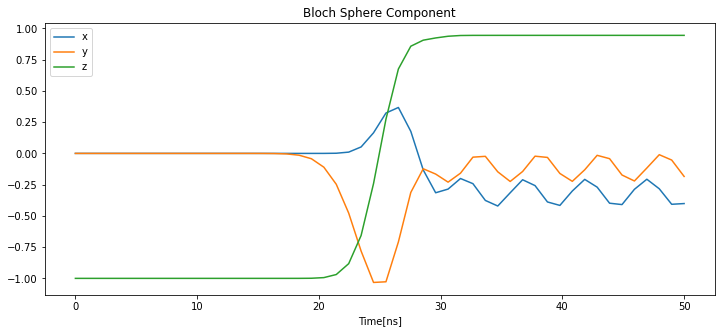

In [95]:
pulse_sigma_ns = 2.5
pulse_length_ns = int(20 * pulse_sigma_ns)

tlist = np.linspace(0, pulse_length_ns, pulse_length_ns)
omega_50_ns = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
H_50_ns = driven_hamiltonian(omega=omega_50_ns, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(H_50_ns,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)

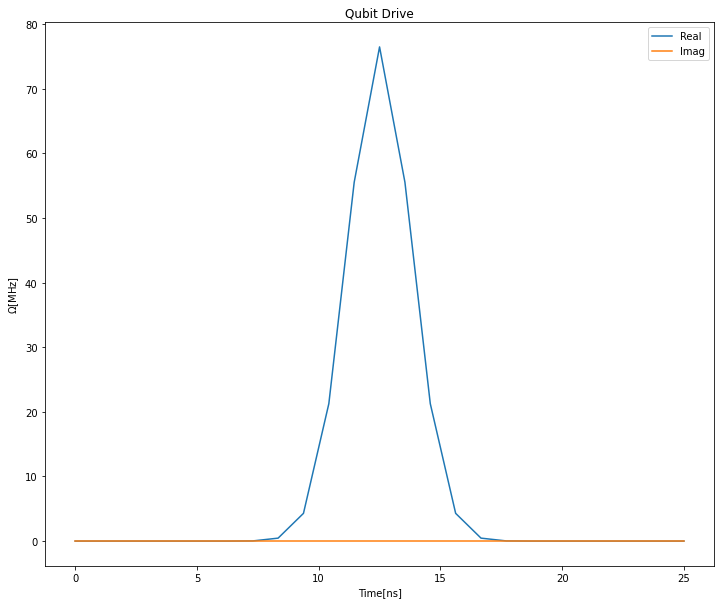

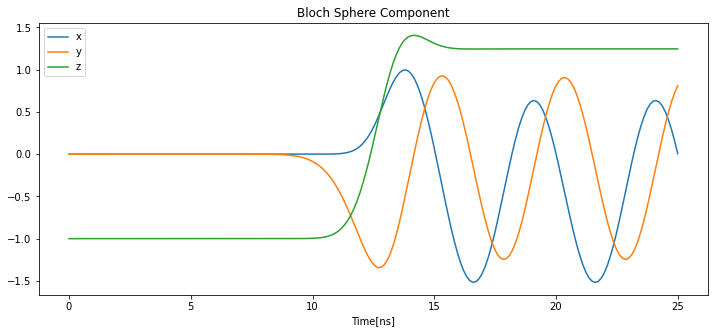

In [96]:
pulse_sigma_ns = 1.25
pulse_length_ns = int(20 * pulse_sigma_ns)

tlist = np.linspace(0, pulse_length_ns, 200)
omega_50_ns = pi_pulse_generator(pulse_sigma_ns, pulse_length_ns)
H_50_ns = driven_hamiltonian(omega=omega_50_ns, free_hamiltonian=transmon_hamiltonian, qubit_x = qubit_x, qubit_y = qubit_y, plot=True)
res = qt.mesolve(H_50_ns,psi0,tlist,c_ops=c_ops, e_ops=e_ops, options=qt.Options(store_states=True))
bvec_array = [res.expect[0],res.expect[1],res.expect[2]]
plot_bloch_vector_component(tlist=tlist, bloch_array=bvec_array)